# Basic GAN

### Here we create a generative adversarial network to generate points of a gaussian distribution
#### (mean=4.0, stddev=1.0)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
#training data
data_x = (np.random.randn(10000) + 4).reshape(10000,1)

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.00000000e+00,   3.50000000e+01,   1.06000000e+02,
          2.92000000e+02,   6.83000000e+02,   1.20100000e+03,
          1.65700000e+03,   1.81500000e+03,   1.73800000e+03,
          1.23600000e+03,   7.15000000e+02,   3.43000000e+02,
          1.19000000e+02,   3.90000000e+01,   1.40000000e+01,
          1.00000000e+00,   1.00000000e+00]),
 array([-1.06286836, -0.58222439, -0.10158043,  0.37906354,  0.85970751,
         1.34035148,  1.82099545,  2.30163941,  2.78228338,  3.26292735,
         3.74357132,  4.22421529,  4.70485925,  5.18550322,  5.66614719,
         6.14679116,  6.62743513,  7.10807909,  7.58872306,  8.06936703,
         8.550011  ]),
 <a list of 20 Patch objects>)

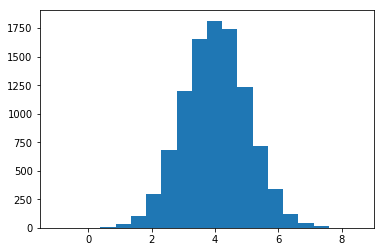

In [73]:
#histogram of out training data
plt.hist(data_x, bins = 20)

In [61]:
#hyperparams
epochs = 100
batch_size = 64
num_batches = data_x.shape[0]//batch_size

In [12]:
#discriminator
x = tf.placeholder(tf.float32, [None, 1], name='x')

w_d_1 = tf.Variable(tf.truncated_normal([1, 20], stddev=0.1), name='w_d_1')
b_d_1 = tf.Variable(tf.zeros([20]), name='b_d_1')

w_d_2 = tf.Variable(tf.truncated_normal([20,1], stddev=0.1), name='w_d_2')
b_d_2 = tf.Variable(tf.zeros([1], name='b_d_2'))

In [23]:
def discriminator(x):
    y1 = tf.nn.relu(tf.matmul(x, w_d_1) + b_d_1)
    logit = tf.matmul(y1, w_d_2) + b_d_2
    y2 = tf.nn.sigmoid(logit)
    
    return y2, logit
    

In [20]:
#generator
z = tf.placeholder(tf.float32, [None, 10], name='z')

w_g_1 = tf.Variable(tf.truncated_normal([10,20], stddev=0.1), name='w_g_1')
b_g_1 = tf.Variable(tf.zeros([20]), name='b_g_1')

w_g_2 = tf.Variable(tf.truncated_normal([20,1], stddev=0.1), name = 'w_g_2')
b_g_2 = tf.Variable(tf.zeros([1]), name='b_g_2')

In [24]:
def generator(z):
    y1 = tf.nn.relu(tf.matmul(z, w_g_1) + b_g_1)
    y2 = tf.nn.relu(tf.matmul(y1, w_g_2) + b_g_2)
    
    return y2

In [27]:
#losses
d_real, d_real_logit = discriminator(x)
d_fake, d_fake_logit = discriminator(generator(z))
loss_d_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_real_logit), logits=d_real_logit))
loss_d_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(d_fake_logit), logits=d_fake_logit))

loss_d = loss_d_fake + loss_d_real

g_fake = discriminator(generator(z))
loss_g = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = tf.ones_like(g_fake), logits=g_fake))

In [28]:
#train
d_vars = [w_d_1, b_d_1, w_d_2, b_d_2]
g_vars = [w_g_1, b_g_1, w_g_2, b_g_2]

solver_d = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_d, var_list = d_vars)
solver_g = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_g, var_list = g_vars)

In [30]:
#random sampling function
def sample(l,m):
    return np.random.randn(l,m)

In [68]:
sess = tf.Session()

In [69]:
sess.run(tf.global_variables_initializer())

In [70]:
losses = []

random_sample = sample(16000,10)

for i in range(epochs):
    ptr = 0
    for j in range(num_batches):
           
        x_train = data_x[ptr:ptr+batch_size]
        ptr+=batch_size
        _, G_curr_loss = sess.run([solver_g, loss_g], feed_dict = {z: sample(batch_size, 10)})
        _, D_curr_loss = sess.run([solver_d, loss_d], feed_dict = {x: x_train, z: sample(batch_size, 10)})

    losses.append((D_curr_loss, G_curr_loss))


    print('Result:')
    print(D_curr_loss, G_curr_loss)
        
    fig = plt.hist(data_x, bins=100)
    fig = plt.hist(sess.run(generator(z), feed_dict={z: random_sample}), bins=100)
    plt.xlim((-10,10))
    plt.savefig('out_basic/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
    plt.close()
        
    
    

Result:
1.31658 0.586791
Result:
1.28219 0.590302
Result:
1.24775 0.594073
Result:
1.21136 0.595301
Result:
1.17957 0.594553
Result:
1.15583 0.594199
Result:
1.14801 0.590561
Result:
1.15747 0.576281
Result:
1.17729 0.551018
Result:
1.20357 0.550695
Result:
1.2903 0.536189
Result:
1.33591 0.535065
Result:
1.39425 0.531031
Result:
1.38587 0.531301
Result:
1.39585 0.54691
Result:
1.42648 0.573727
Result:
1.43497 0.587782
Result:
1.43383 0.608755
Result:
1.41876 0.625134
Result:
1.41357 0.636862
Result:
1.40737 0.648581
Result:
1.40266 0.658101
Result:
1.39645 0.665919
Result:
1.3898 0.670491
Result:
1.38893 0.671119
Result:
1.3849 0.664045
Result:
1.38812 0.660148
Result:
1.38547 0.65042
Result:
1.38558 0.64229
Result:
1.38124 0.629168
Result:
1.38754 0.616563
Result:
1.39025 0.607548
Result:
1.38825 0.597327
Result:
1.38613 0.589787
Result:
1.38481 0.584866
Result:
1.3856 0.581482
Result:
1.38695 0.582608
Result:
1.38688 0.584137
Result:
1.38779 0.585452
Result:
1.38766 0.587233
Result:

(array([   8.,   32.,   67.,  145.,  225.,  229.,  173.,   89.,   27.,    5.]),
 array([ 1.00317407,  1.60478113,  2.20638819,  2.80799525,  3.40960231,
         4.01120937,  4.61281643,  5.21442349,  5.81603055,  6.41763761,
         7.01924467]),
 <a list of 10 Patch objects>)

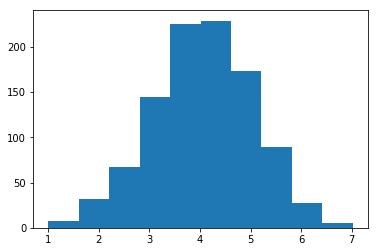

In [75]:
#let us check the output of the generator after training
plt.hist(sess.run(generator(z), feed_dict={z: sample(1000,10)}))

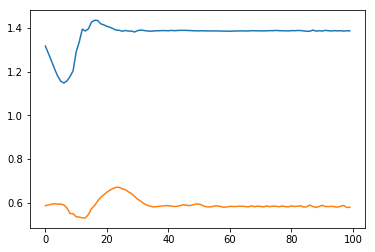

In [76]:
#plotting losses
plt.plot(losses)

### A note on discriminator and generator loss

In a GAN, we want the generator to be good enough so that it fools the discriminator. In such a scenario, the discriminator would be unable to distinguish real samples from the fake ones and would give an output of 0.5 for both.

Taking a look at the loss functions used and plugging in 0.5 for discriminator output for both x and G(z)...

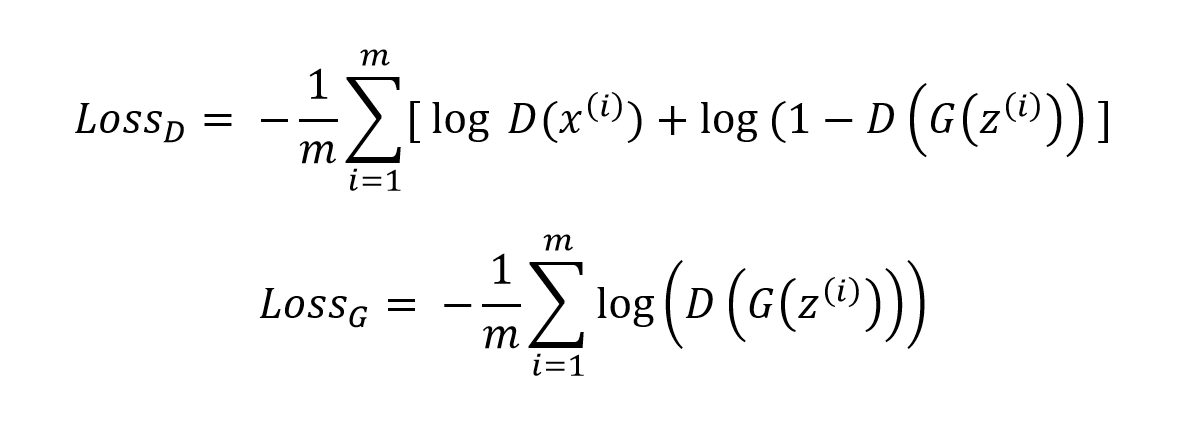

In [1]:
from IPython.core.display import Image 
Image(filename='./images/losses.png')

...we get Discriminator loss as 1.38 and Generator loss as 0.69, which is indeed the case in the above training run.

The folder 'out_basic' contains histograms of generator outputs(orange) and original distribution(blue) plotted after each epoch.